**<p>Disciplina:** Métodos Numéricos</p>
**<p>Semestre:** 2020.1</p>
**<p>Aluno:** Jardel Brandon de Araujo Regis</p>
**<p>Mátricula:** 201621250014</p>
**<p>1ª Unidade:** REPRESENTAÇÃO NUMÉRICA E TIPOS DE ERROS</p>

---
# <center>Erros de Arredondamento e Truncamento</center>
## <center>Lista de Exercícios</center>
---

In [1]:
import numpy as np
import pandas as pd
from itertools import *
from sympy import *
from decimal import *
import matplotlib.pyplot as plt

In [2]:
#funções auxiliares 

erro_total = lambda valor_verdadeiro, aproximacao: valor_verdadeiro - aproximacao

erro_relativo_fracionario = lambda valor_verdadeiro, aproximacao: (valor_verdadeiro - aproximacao) / valor_verdadeiro

erro_relativo_percentual = lambda valor_verdadeiro, aproximacao: (valor_verdadeiro - aproximacao) / valor_verdadeiro * 100

def imprimir_tabela(dados, index = None):
    pd.set_option("display.precision", 20)
    df = pd.DataFrame(dados, index)
    print(df)

def imprimir_grafico(dados):
    plt.xlabel('Intervalo')
    plt.ylabel('Valor resultante')
    plt.grid(True)
    plt.style.use('fivethirtyeight')
    plt.plot(np.arange(len(dados)), dados)
    plt.show

#### Questão 1
O método “divisão e média”, um método antigo para estimação de raiz quadrada de um número
positivo a, pode ser formulado como
$$x_{i+1}=\frac{x_{i}+\frac{a}{x_{i}}}{2}$$
Calcule o erro relativo da aproximação para as 10 primeiras iterações.

In [3]:
divisao_e_media = lambda x, i: (i + np.divide(x, i)) / 2

In [4]:
valor = 55
iteracoes = 10

raiz_quadrada = np.sqrt(valor)
divisoes_e_medias = [divisao_e_media(valor, i) for i in range(iteracoes)]
erros_totais = [erro_total(raiz_quadrada, aproximacao) for aproximacao in divisoes_e_medias]
erros_relativos = [erro_relativo_fracionario(raiz_quadrada, aproximacao) for aproximacao in divisoes_e_medias]
erros_relativos_percentuais = [erro_relativo_percentual(raiz_quadrada, aproximacao) for aproximacao in divisoes_e_medias]

tabela = {'Valor':                     valor,
          'Raiz quadrada':             raiz_quadrada,
          'Divisao e media (x_i+1)':   divisoes_e_medias,
          'Erro total':                erros_totais,
          'Erro relativo fracionario': erros_relativos,
          'Erro relativo percentual':  erros_relativos_percentuais}

imprimir_tabela(tabela)

   Valor           Raiz quadrada  Divisao e media (x_i+1)  \
0     55  7.41619848709566298339                      inf   
1     55  7.41619848709566298339  28.00000000000000000000   
2     55  7.41619848709566298339  14.75000000000000000000   
3     55  7.41619848709566298339  10.66666666666666607455   
4     55  7.41619848709566298339   8.87500000000000000000   
5     55  7.41619848709566298339   8.00000000000000000000   
6     55  7.41619848709566298339   7.58333333333333303727   
7     55  7.41619848709566298339   7.42857142857142882519   
8     55  7.41619848709566298339   7.43750000000000000000   
9     55  7.41619848709566298339   7.55555555555555535818   

                Erro total  Erro relativo fracionario  \
0                     -inf                       -inf   
1 -20.58380151290433701661    -2.77551922979415577331   
2  -7.33380151290433701661    -0.98888959426656419804   
3  -3.25046817957100309116    -0.43829303992158302750   
4  -1.45880151290433701661    -0.1967047558

C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


#### Questão 2

Para computadores, o épsilon da máquina, ε, pode ser definido como o menor número que,
adicionado a um, retorna um número maior que um. Usando o algoritmo abaixo, implemente
um programa que calcula o épsilon da sua máquina. Compare com os resultados obtidos via
numpy.


Passo 1: Defina e = 1 .<br />
Passo 2: Se 1 + e for menor ou igual a 1, vá para o Passo 5;<br />
caso contrário, vá ao Passo 3<br />
Passo 3: e = e/2<br />
Passo 4: Retorne ao Passo 2<br />
Passo 5: e = 2 x e<br />

In [5]:
def epsilon(limiar):
    while((limiar + 1) > 1):
        limiar /= 2
    return limiar * 2

imprimir_tabela({'funcao criada': [epsilon(1)], 
                 'funcao do numpy': [np.finfo(float).eps]})

            funcao criada         funcao do numpy
0  0.00000000000000022204  0.00000000000000022204


#### Questão 3

A derivada de $f(x)= \frac{1}{\left(1-3 x^{2}\right)}$ é dada por 
$$f^{\prime}(x)=\frac{6 x}{\left(1-3 x^{2}\right)^{2}}$$
Avalie $ f^{'}(0.577)$ e comente o resultado obtido.

In [6]:
derivada = lambda x: 6 * x / (1 - 3 * x ** 2) ** 2

print(derivada(0.577))

2352910.792601485


##### Comentário:

Ao relizar a conta em uma calculadora científica, obtemos os seguintes resultados:
$$ f^{'}(0.577) = \frac{6 x}{\left(1-3 x^{2}\right)^{2}}$$
$$ \dots = \frac{6 \times 0.577}{\left(1-3 \times 0.577^{2}\right)^{2}}$$
$$ \dots = \frac{3.462}{\left(1-3 \times 0,332929‬\right)^{2}}$$
$$ \dots = \frac{3.462}{\left(1-0,998787‬\right)^{2}}$$
$$ \dots = \frac{3.462}{\left(0,001213‬‬\right)^{2}}$$
$$ \dots = \frac{3.462}{\left(0,000001471369\right)‬‬}$$
$$ f^{'}(0.577) = 2.352.910,7926019917505398034075749‬‬$$
De tal modo que podemos visualizar uma pequena diferença em questão de precisão

#### Questão 4

Considere o seguinte processo iterativo:
$$\begin{aligned}x^{(1)} &=\frac{1}{3} \\ x^{(n+1)} &=4 x^{(n)}-1, \quad n=1,2, \dots \end{aligned}$$ <br />
Observe que $x^{(1)}=\frac{1}{3}, x^{(2)}=4 \cdot \frac{1}{3}-1=\frac{1}{3}, x^{(3)}=\frac{1}{3}$, ou seja, temos uma sequência constante igual a $\frac{1}{3}$. <br />
Implemente essa série iterativa, verificando se a convergência de fato ocorre e justifique o resultado obtido

In [7]:
memorizacao = dict() #Atal
def processo_iterativo(indice):
    if indice == 0: return 1 / 3
    if indice not in memorizacao:
        memorizacao[indice] = 4 * processo_iterativo(indice - 1) - 1
    return memorizacao[indice]

QUANTIDADE_ITERACOES = 540
resultado = processo_iterativo(QUANTIDADE_ITERACOES)
imprimir_tabela({'Valor': '1/3','Resultado': 1 / 3, 'Processo iterativo': list(memorizacao.values())})

    Valor               Resultado           Processo iterativo
0     1/3  0.33333333333333331483   3.33333333333333259318e-01
1     1/3  0.33333333333333331483   3.33333333333333037274e-01
2     1/3  0.33333333333333331483   3.33333333333332149095e-01
3     1/3  0.33333333333333331483   3.33333333333328596382e-01
4     1/3  0.33333333333333331483   3.33333333333314385527e-01
..    ...                     ...                          ...
535   1/3  0.33333333333333331483 -9.36298507740789483301e+305
536   1/3  0.33333333333333331483 -3.74519403096315793320e+306
537   1/3  0.33333333333333331483 -1.49807761238526317328e+307
538   1/3  0.33333333333333331483 -5.99231044954105269312e+307
539   1/3  0.33333333333333331483                         -inf

[540 rows x 3 columns]


##### Comentário:

Como podemos observar, a medida em que o valor da iteração aumenta, a difernça do valor "Real" também aumenta, de tal maneira que chega ao um número "infinito", isso implica que pelo fato do computador não possuir mémoria infinita, se faz necessário realizar um truncamento na precisão decimal de certos números, fazendo existir asim uma propragação do erro, como o erro visto acima.

#### Questão 5

Observe a seguinte identidade 
<br />
$$f(x)=\frac{(1+x)-1}{x}=1$$
<br />
Calcule o valor da expressão à esquerda para $x=10^{-12}, x=10^{-13}, x=10^{-14}, x=10^{-15}, x=10^{-16}$ e $x=10^{-17}$.
Explique os resultados.

In [8]:
identidade = lambda x: ((1 + x) - 1) / x  
imprimir_tabela([identidade(10 ** x) for x in range(-12, -18, -1)], index= list(range(-12, -18, -1)))

                          0
-12  1.00008890058234101161
-13  0.99920072216264088638
-14  0.99920072216264088638
-15  1.11022302462515654042
-16  0.00000000000000000000
-17  0.00000000000000000000


##### Comentário:

Como é possível observar, a identidade matemática apresentada acima não se faz correspondida fielmente computacionalmente, pois de acordo com a fórmula para quaisquer valores da variável (x), o resultado deveria ser 1.
Porém os resultados obtidos demonstram a quebra dessa regra, isso acontece devido ao fato da limitação computação para realizar trabalhos com grandes números ou com decimais, assim pode-se observar o efeito acontecido nessa questão.

#### Questão 6

Considere as expressões:
$$\frac{\exp (\frac{1}{\mu})}{1+\exp (\frac{1}{\mu})}$$
e <br />
$$\frac{1}{\exp (\frac{-1}{\mu})+1}$$
com $\mu>0$. Verifique que elas são idênticas como funções reais. Teste no computador cada uma
delas para $\mu = 0$, $1$, $\mu = 0$, $01$ e $\mu = 0,001$. Qual dessas expressões é mais adequada quando $\mu$ é
um número pequeno? Por quê?

In [9]:
expressao_1 = lambda u: np.exp(np.divide(1, u)) / 1 + np.exp(np.divide(1, u))
expressao_2 = lambda u: 1 / np.exp(np.divide(-1, u)) + 1

iteracoes = range(10, -4, -1)
imprimir_tabela({'Expressao 1': [expressao_1(10 ** i) for i in iteracoes],
                 'Expressao 2': [expressao_2(10 ** i) for i in iteracoes]}, index=iteracoes)

                   Expressao 1                 Expressao 2
10  2.00000000020000001655e+00  2.00000000010000000827e+00
9   2.00000000200000016548e+00  2.00000000100000008274e+00
8   2.00000001999999987845e+00  2.00000000999999993923e+00
7   2.00000020000000988674e+00  2.00000010000000472132e+00
6   2.00000200000099992437e+00  2.00000100000050018423e+00
5   2.00002000010000013930e+00  2.00001000005000006965e+00
4   2.00020001000033342820e+00  2.00010000500016671410e+00
3   2.00200100033341676919e+00  2.00100050016670838460e+00
2   2.02010033416833589826e+00  2.01005016708416794913e+00
1   2.21034183615129542488e+00  2.10517091807564771244e+00
0   5.43656365691809018159e+00  3.71828182845904509080e+00
-1  4.40529315896134357899e+04  2.20274657948067142570e+04
-2  5.37623428363227121885e+43  2.68811714181613511425e+43
-3                         inf                         inf


C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


##### Comentário:

Como podemos observar, no gráfico abaixo, ou em resultados de calculadoras, a tendência para um valor de entrada que tende a -infinito é convergir para $0,5$ de tal forma que o valor da expressão 1 se torna mais fiel ao valor correto.

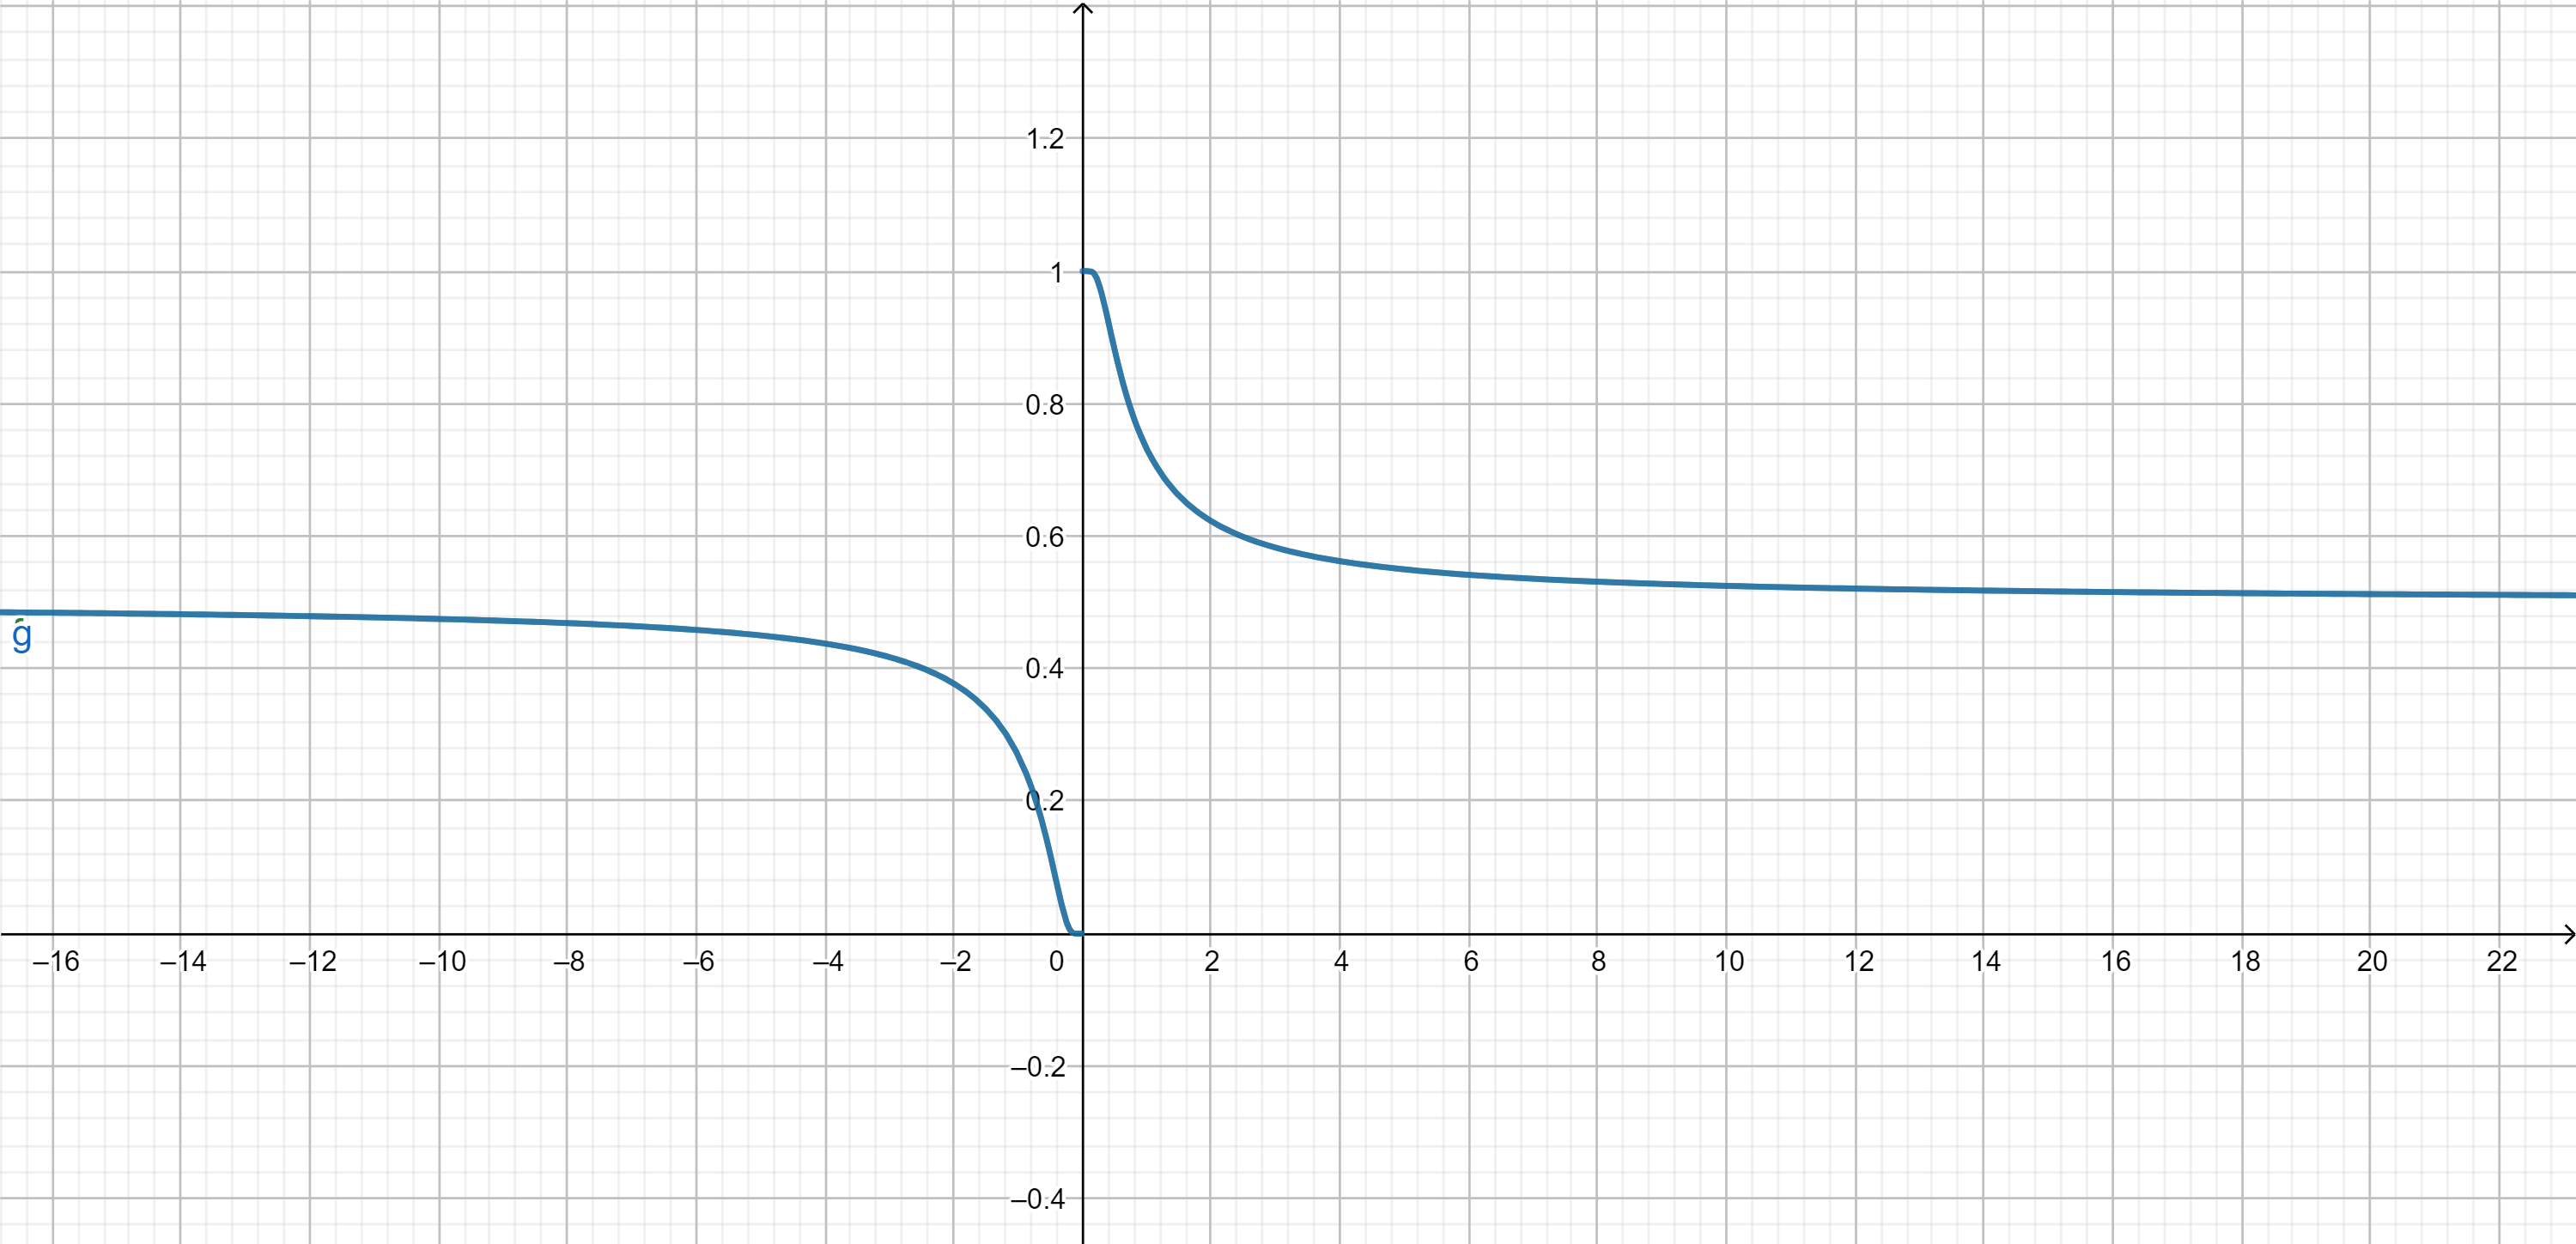
Gráfico disponível no seguinte link: https://www.geogebra.org/calculator/gdwzwtn2



#### Questão 7

Na teoria da relatividade restrita, a energia cinética de uma partícula e sua velocidade se relacionam pela seguinte fórmula:
$$E=m c^{2}\left(\frac{1}{\sqrt{1-(\frac{v}{c})^{2}}}-1\right),$$
onde $E$ é a energia cinética da partícula, $m$ é a massa de repouso, $v$ o módulo da velocidade e $c$
a velocidade da luz no vácuo dada por $c = 299792458\frac{m}{s}$. Considere que a massa de repouso
$m = 9$, $10938291 × 10^{−31}Kg$ do elétron seja conhecida com erro relativo de $10^{-9}$. 
Qual é o valor da energia e o erro relativo associado a essa grandeza quando $v = 0$, $1c$, $v = 0$, $5c$, $v = 0$, $99c$ e
$v = 0$, $999c$ sendo que a incerteza relativa na medida da velocidade é $10^{-5}$?

In [10]:
c = 299792458
m = 9.10938291e-31

E = lambda v: m * c ** 2 * ((1 / np.sqrt(1 - (np.divide(v, c)) ** 2)) - 1)

velocidades = [0, 0.5 * c, 0.99 * c, 0.999 * c]
energias = [E(v) for v in velocidades]

#variações relativas aos erros de precisão
m += 1e-9
c += 1e-5
velocidades = [0, 0.5 * c, 0.99 * c, 0.999 * c]
energias_relativas = [E(v) for v in velocidades]


erros_totais = [erro_total(energia, energias_relativa) for energia, energias_relativa in zip(energias, energias_relativas)]
erros_relativos = [erro_relativo_fracionario(energia, energias_relativa) for energia, energias_relativa in zip(energias, energias_relativas)]
erros_relativos_percentuais = [erro_relativo_percentual(energia, energias_relativa) for energia, energias_relativa in zip(energias, energias_relativas)]

tabela = {'Energias':                  energias,
          'Energias Relativas':        energias_relativas,
          'Erro total':                erros_totais,
          'Erro relativo fracionario': erros_relativos,
          'Erro relativo percentual':  erros_relativos_percentuais}

imprimir_tabela(tabela)

                 Energias          Energias Relativas  \
0  0.00000000000000000000  0.00000000000000000000e+00   
1  0.00000000000001266550  1.39037910021735541523e+07   
2  0.00000000000049849744  5.47235136236791968346e+08   
3  0.00000000000174927914  1.92030476481647324562e+09   

                   Erro total  Erro relativo fracionario  \
0  0.00000000000000000000e+00                        NaN   
1 -1.39037910021735541523e+07  -1097769201141273460736.0   
2 -5.47235136236791968346e+08  -1097769201141266513920.0   
3 -1.92030476481647324562e+09  -1097769201141273329664.0   

     Erro relativo percentual  
0                         NaN  
1 -1.09776920114127353938e+23  
2 -1.09776920114126649295e+23  
3 -1.09776920114127337161e+23  


C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\jarde\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Resolver os exercícios do final do capítulo 4 do livro Métodos Numéricos Aplicados com Matlab
para Engenheiros e Cientistas, do Steven C. Chapra:

#### Questão 8

(Chapra, 2013) Questão 4.8

In [11]:
x = Symbol('x')
init_printing()
init_session()

f = 1 / (1 - 3 * x ** 2)
dx = Derivative(f).doit()

print('Função:')
pprint(f)
print('Derivada:')
pprint(dx)

valor_verdadeiro = round(dx.subs(x, 0.577).doit())
print('Valor verdadeiro da derivada:', valor_verdadeiro, '\n\n')

#Utilizando três algarismos significativos:
print('Valor sem truncamento:', 6 * 0.577)
print('Valor truncado em 3 algarismos:', round(Decimal(6 * 0.577), 2))

print('Valor sem truncamento:', 0.577 ** 2)
print('Valor truncado em 3 algarismos:', round(Decimal(0.577 ** 2), 3))

dx_3_algarismos = round(round(Decimal(6 * 0.577), 2) / ((1 - 3 * round(Decimal(0.577 ** 2), 3)) ** 2))
print("Valor da derivada utilizando 3 digitos significativos:", dx_3_algarismos)
print("valor do erro com 3 digitos:", round(erro_relativo_percentual(valor_verdadeiro, dx_3_algarismos), 1), '%\n\n')

#Utilizando quatro algarismos significativos:
print('Valor sem truncamento:', 6 * 0.577)
print('Valor truncado em 4 algarismos:', round(Decimal(6 * 0.577), 3))

print('Valor sem truncamento:', 0.577 ** 2)
print('Valor truncado em 4 algarismos:', round(Decimal(0.577 ** 2), 4))

dx_4_algarismos = round(round(Decimal(6 * 0.577), 3) / ((1 - 3 * round(Decimal(0.577 ** 2), 4)) ** 2))
print("Valor da derivada utilizando 4 digitos significativos:", dx_4_algarismos)
print("valor do erro com 4 digitos:", round(erro_relativo_percentual(valor_verdadeiro, dx_4_algarismos)), '%')

IPython console for SymPy 1.5.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/

Função:
   1    
────────
       2
1 - 3⋅x 
Derivada:
    6⋅x    
───────────
          2
⎛       2⎞ 
⎝1 - 3⋅x ⎠ 
Valor verdadeiro da derivada: 2352911 


Valor sem truncamento: 3.4619999999999997
Valor truncado em 3 algarismos: 3.46
Valor sem truncamento: 0.332929
Valor truncado em 3 algarismos: 0.333
Valor da derivada utilizando 3 digitos significativos: 3460000
valor do erro com 3 digitos: -47.1 %


Valor sem truncamento: 3.4619999999999997
Valor truncado em 4 algarismos: 3.462
Valor sem truncamento: 0.332929
Valor truncado em 4 algarismos: 0.3329
Valor da derivada utilizando 4 digitos significativos: 2048521
valo

#### Questão 9

(Chapra, 2013) Questão 4.9

In [12]:
y = x ** 3 - 7 * x ** 2 + 8 * x - 0.35
print('Polinômio:')
pprint(y)

valor_verdadeiro = y.subs(x, 1.37).doit()
print('Valor verdadeiro do polinômio com x = 1.37:', valor_verdadeiro, '\n\n')

# a) Sem fatoração - Utilizando três algarismos significativos:
y1 = 1.37 ** 3
print('Valor sem truncamento:', y1)
y2 =  round(Decimal(y1), 2)
print('Valor truncado em 3 algarismos:', y2)

y3 = -7 * 1.37 ** 2
print('Valor sem truncamento:', y3)
y4 = round(Decimal(y3), 1)
print('Valor truncado em 3 algarismos:', y4)

y5 = 8 * 1.37
print('Valor sem truncamento:', y5)
y6 = round(Decimal(y5), 1)
print('Valor truncado em 3 algarismos:', )

y_3_algarismos = round(y2 + y4 + y6 + Decimal(-0.35), 2)
print("Valor do polinômio utilizando 3 digitos significativos - Sem fatoração:", y_3_algarismos)
print("valor do erro sem fatoração:", round(abs(erro_relativo_percentual(valor_verdadeiro, y_3_algarismos)), 1), '%\n\n')

# b) Com fatoração - Utilizando três algarismos significativos:
y = ((x - 7) * x + 8) * x - 0.35
print('Polinômio fatorado:')
pprint(y)
print(y.subs(x, 1.37).doit())

y1 = 1.37 - 7
print('Valor sem truncamento:', y1)
y2 = round(Decimal(y1), 2)
print('Valor truncado em 3 algarismos:', y2)

y3 = y2 * Decimal(1.37)
print('Valor sem truncamento:', y3)
y4 = round(Decimal(y3), 2)
print('Valor truncado em 3 algarismos:', y4)

y5 = y4 + 8
print('Valor sem truncamento:', y4)
y6 = round(Decimal(y5), 3)
print('Valor truncado em 3 algarismos:', y6)

y7 = y6 * Decimal(1.37)
print('Valor sem truncamento:', y7)
y8 = round(Decimal(y7), 3)
print('Valor truncado em 3 algarismos:', y8)

y9 = y8 - Decimal(0.35)
print('Valor sem truncamento:', y8)
y10 = round(Decimal(y9), 3)
print('Valor truncado em 3 algarismos:', y10)

y_fatorado = round(Decimal(y10), 3)
print("Valor do polinômio utilizando 3 digitos significativos - Com fatoração:", y_fatorado)
print("valor do erro sem fatoração:", round(erro_relativo_percentual(valor_verdadeiro, y_fatorado), 1), '%')

Polinômio:
 3      2             
x  - 7⋅x  + 8⋅x - 0.35
Valor verdadeiro do polinômio com x = 1.37: 0.0430530000000005 


Valor sem truncamento: 2.5713530000000007
Valor truncado em 3 algarismos: 2.57
Valor sem truncamento: -13.138300000000001
Valor truncado em 3 algarismos: -13.1
Valor sem truncamento: 10.96
Valor truncado em 3 algarismos:
Valor do polinômio utilizando 3 digitos significativos - Sem fatoração: 0.12
valor do erro sem fatoração: 178.7 %


Polinômio fatorado:
x⋅(x⋅(x - 7) + 8) - 0.35
0.0430529999999991
Valor sem truncamento: -5.63
Valor truncado em 3 algarismos: -5.63
Valor sem truncamento: -7.713100000000000600053340349
Valor truncado em 3 algarismos: -7.71
Valor sem truncamento: -7.71
Valor truncado em 3 algarismos: 0.290
Valor sem truncamento: 0.3973000000000000309086090056
Valor truncado em 3 algarismos: 0.397
Valor sem truncamento: 0.397
Valor truncado em 3 algarismos: 0.047
Valor do polinômio utilizando 3 digitos significativos - Com fatoração: 0.047
valor do erro

#### Questão 10

(Chapra, 2013) Questão 4.11

$$\cos x=\sum_{n=0}^{\infty} \frac{(-1)^{n}}{(2 n) !} x^{2 n}; \quad|x| \leq 1$$

In [13]:
PRECISAO = 1e-3
condicao_de_parada = lambda resultado: np.abs(erro_relativo_percentual(resultado, VALOR_VERDADEIRO)) > PRECISAO

def imprimir_tabela(dados):
    pd.set_option("display.precision", 20)
    df = pd.DataFrame(dados)
    print(df)

x = 0
VALOR_VERDADEIRO = np.cos(np.pi / 4)

x = Symbol('x')
cos_maclaurin = Sum((((-1) ** n * x ** (2 * n)) / factorial(2 * n)), (n, 0, oo))
pprint(cos_maclaurin)

valores = list(takewhile(condicao_de_parada, (N(cos_maclaurin.subs([(x, np.pi / 4), (oo, i)])) for i in count())))

erros_totais = [erro_total(valor, VALOR_VERDADEIRO) for valor in valores]
erros_relativos_percentuais = [erro_relativo_percentual(valor, VALOR_VERDADEIRO) for valor in valores]

tabela = {'Valor':            VALOR_VERDADEIRO,
          'Resultados_i':     valores,
          'Erro total':       erros_totais,
          'Erro percentual (%):': erros_relativos_percentuais}

imprimir_tabela(tabela)

  ∞             
 ____           
 ╲              
  ╲       n  2⋅n
   ╲  (-1) ⋅x   
   ╱  ──────────
  ╱     (2⋅n)!  
 ╱              
 ‾‾‾‾           
n = 0           
                    Valor       Resultados_i            Erro total  \
0  0.70710678118654757274   1.00000000000000     0.292893218813452   
1  0.70710678118654757274  0.691574862465958   -0.0155319187205900   
2  0.70710678118654757274  0.707429206709773  0.000322425523225478   

  Erro percentual (%):  
0     29.2893218813452  
1    -2.24587670309584  
2   0.0455770726126883  


#### Questão 11

(Chapra, 2013) Questão 4.13

$$f(x)=\sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n !}(x-a)^{n}$$

In [14]:
x, a = symbols(('x a'))
f = 25 * x ** 3 - 6 * x ** 2 + 7 * x - 88
pprint(f)
valor_x = 1
VALOR_VERDADEIRO = f.subs(x, valor_x)

print('Série de Taylor para o polinômio em questão:\n', pretty(f.series(x, x0=a)))

print(*[('\nPolinômio de Taylor ordem '+ str(i) + ':\n' + pretty(f.taylor_term(i, x))) for i in range(4)], sep='\n')

print("Somando todos os graus do polinômio de taylor e substituindo x por 1, obtemos o valor resultante a cada iteração!")
valores = list(accumulate([f.taylor_term(i, x).subs(x, valor_x) for i in range(4)]))

erros_totais = [erro_total(valor, VALOR_VERDADEIRO) for valor in valores]
erros_relativos_percentuais = [round(erro_relativo_percentual(valor, VALOR_VERDADEIRO), 2) for valor in valores]

tabela = {'Valor':            VALOR_VERDADEIRO,
          'Resultados_i':     valores,
          'Erro total':       erros_totais,
          'Erro percentual (%):': erros_relativos_percentuais}

imprimir_tabela(tabela)

    3      2           
25⋅x  - 6⋅x  + 7⋅x - 88
Série de Taylor para o polinômio em questão:
     3      2                    3           2                       ⎛    2    
25⋅a  - 6⋅a  + 7⋅a + 25⋅(-a + x)  + (-a + x) ⋅(75⋅a - 6) + (-a + x)⋅⎝75⋅a  - 1

       ⎞     
2⋅a + 7⎠ - 88

Polinômio de Taylor ordem 0:
-88

Polinômio de Taylor ordem 1:
7⋅x

Polinômio de Taylor ordem 2:
    2
-6⋅x 

Polinômio de Taylor ordem 3:
    3
25⋅x 
Somando todos os graus do polinômio de taylor e substituindo x por 1, obtemos o valor resultante a cada iteração!
  Valor Resultados_i Erro total Erro percentual (%):
0   -62          -88        -26                29.55
1   -62          -81        -19                23.46
2   -62          -87        -25                28.74
3   -62          -62          0                    0


#### Questão 12

(Chapra, 2013) Questão 4.17

$$f^{\prime \prime}(x)=\frac{f(x+h)-2 f(x)+f(x-h)}{h^{2}}+o\left(h^{2}\right)$$

In [15]:
derivada_2 = f.diff(x, 2)
print("2ª Derivada do polinômio:\n", pretty(derivada_2))
valor_x = 2
print("Valor verdadeiro:", derivada_2.subs(x, valor_x))

print("Usando aproximação por diferença centrada, Para h = 0.2, temos:")
h = 0.2
print((f.subs(x, valor_x + h) - 2 * f.subs(x, valor_x) + f.subs(x, valor_x - h)) / h ** 2) 

print("Usando aproximação por diferença centrada, Para h = 0.1, temos:")
h = 0.1
print((f.subs(x, valor_x + h) - 2 * f.subs(x, valor_x) + f.subs(x, valor_x - h)) / h ** 2)

print("Ambos são exatos porque os erros são uma função de derivadas de quarta e superiores que são zero para um polinômio de terceira ordem.")

2ª Derivada do polinômio:
 6⋅(25⋅x - 2)
Valor verdadeiro: 288
Usando aproximação por diferença centrada, Para h = 0.2, temos:
288.000000000003
Usando aproximação por diferença centrada, Para h = 0.1, temos:
288.000000000001
Ambos são exatos porque os erros são uma função de derivadas de quarta e superiores que são zero para um polinômio de terceira ordem.


#### Questão 13

(Chapra, 2013) Questão 4.19

Função para calcular as coordenadas espacias de um planeta:
x - 0.5⋅sin(x) - 1

Série de Taylor para a função em questão:
                                2                                     3        
-1 - 0.5⋅sin(a) + 0.25⋅(-a + x) ⋅sin(a) + 0.0833333333333333⋅(-a + x) ⋅cos(a) 

                             4                                      5         
- 0.0208333333333333⋅(-a + x) ⋅sin(a) - 0.00416666666666667⋅(-a + x) ⋅cos(a) +

                                  ⎛        6       ⎞
 (1 - 0.5⋅cos(a))⋅(-a + x) + a + O⎝(-a + x) ; x → a⎠


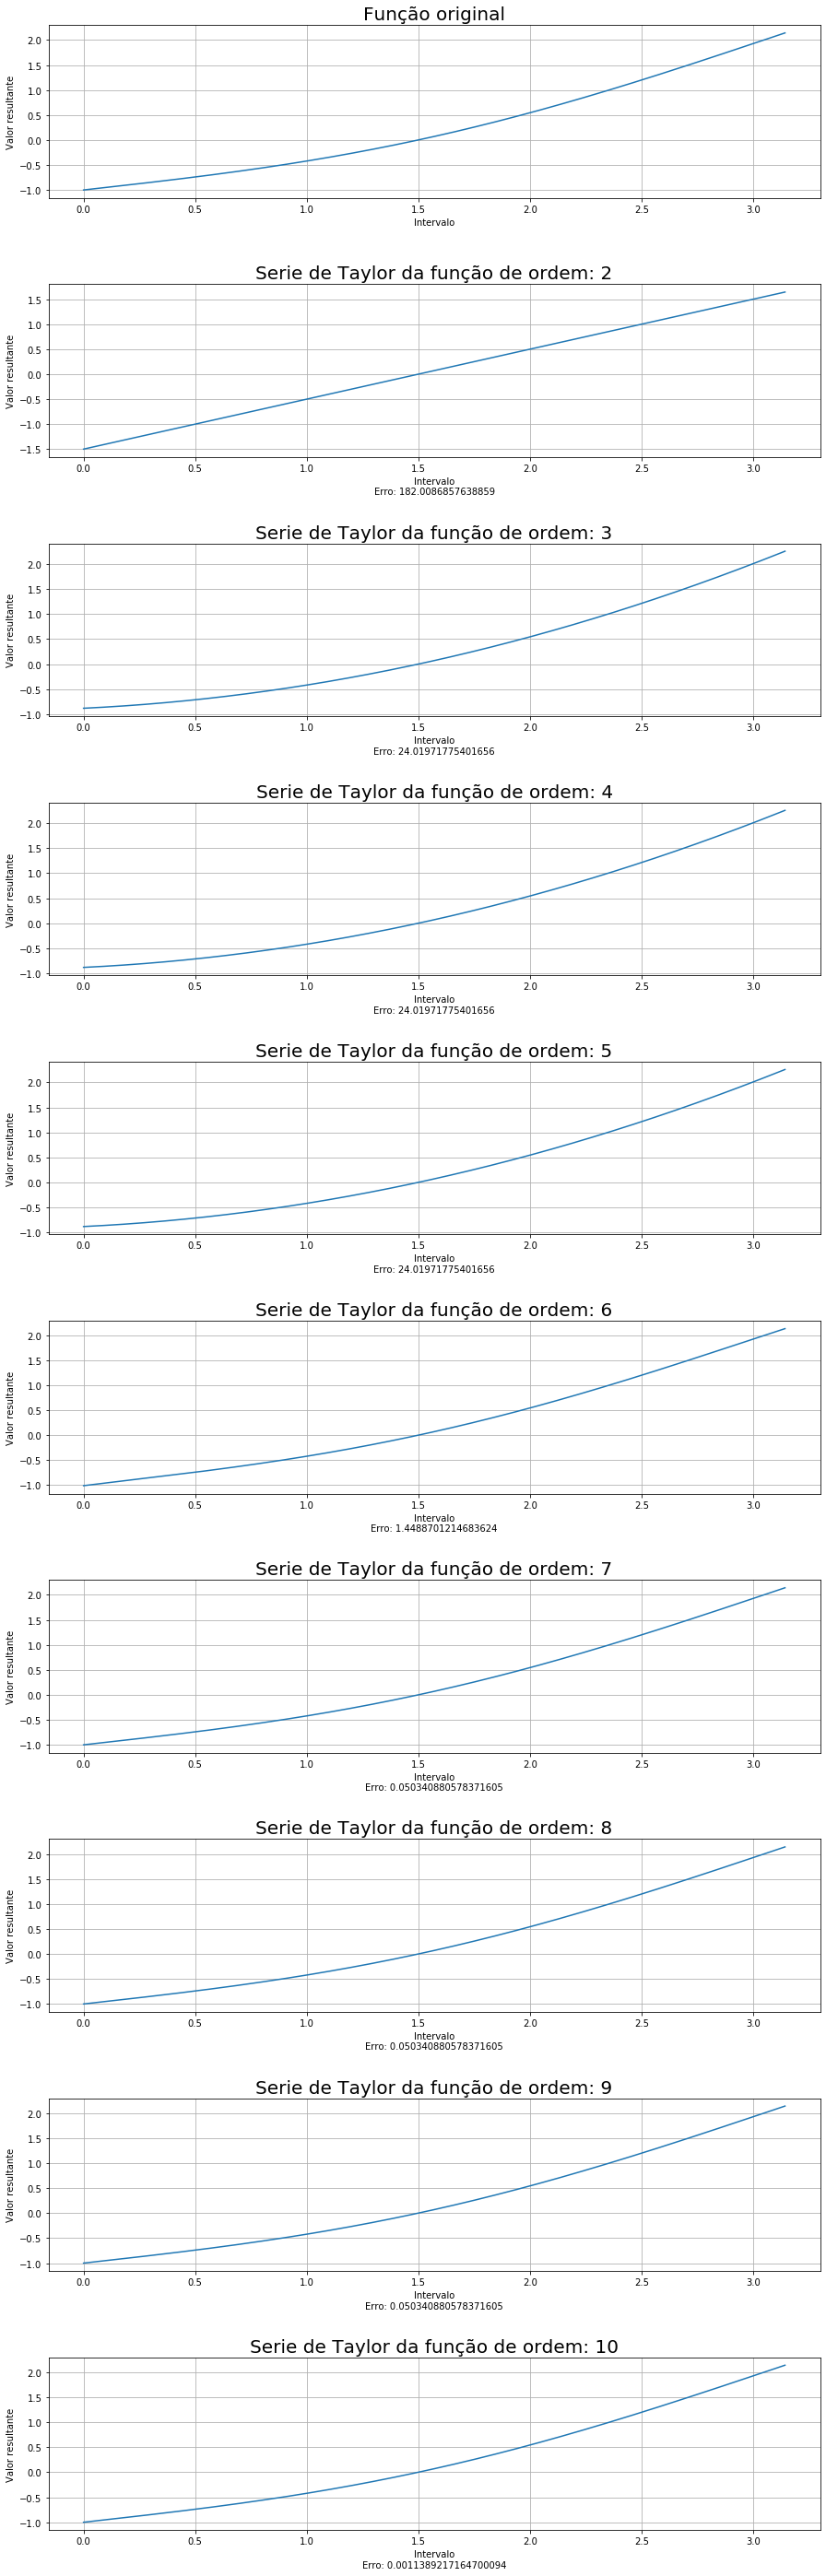

In [16]:
%matplotlib inline

print("Função para calcular as coordenadas espacias de um planeta:")
f = x - 1 - 0.5 * sin(x)
pprint(f)
print('\nSérie de Taylor para a função em questão:\n', pretty(f.series(x, x0=a)))

intervalo = np.linspace(0, np.pi, 1000)
iteracao = 0
funcao = lambdify(x, f, "numpy")
taylor_termo = lambdify(x, f.series(x, x0=np.pi/2, n=iteracao).removeO())
while (abs(sum(erro_total(funcao(intervalo), taylor_termo(intervalo)))) > 0.015):
    iteracao += 1
    taylor_termo = lambdify(x, f.series(x, x0=np.pi/2, n=iteracao).removeO())
    
fig, ax = plt.subplots(nrows=iteracao, ncols=1, figsize=(15, 50))
for indice, row in enumerate(ax):
    row.set_ylabel('Valor resultante')
    row.grid()
    if indice == 0: 
        row.set_xlabel('Intervalo')
        row.set_title("Função original", fontsize=20)
        row.plot(intervalo, funcao(intervalo))
    else:
        taylor_termo = lambdify(x, f.series(x, x0=np.pi/2, n=indice+1).removeO())
        row.set_xlabel('Intervalo\nErro: ' + str(abs(sum(erro_total(funcao(intervalo), taylor_termo(intervalo))))))
        row.set_title("Serie de Taylor da função de ordem: " + str(indice+1), fontsize=20)
        plt.subplots_adjust(hspace=0.5)
        row.plot(intervalo, taylor_termo(intervalo))

plt.show()

#### Questão 14

(Chapra, 2013) Questão 4.24

In [17]:
def quadratica_normal(a = 0, b = 0, c = 0):
    x1 = (-b + sqrt(b ** 2 + 4 * a * c)) / 2 * a
    x2 = (-b + sqrt(b ** 2 + 4 * a * c)) / 2 * a
    return (x1, x2)

def quadratica_alternativa(a = 0, b = 0, c = 0):
    x1 = -2 * c / (b + sqrt(b ** 2 - 4 * a * c))
    x2 = -2 * c / (b - sqrt(b ** 2 - 4 * a * c))
    return (x1, x2)
a = 1
b = -5000.002
c = 10
print("Quadratica Normal:", quadratica_normal(a, b, c))
print("Quadratica Alternativa:", quadratica_alternativa(a, b, c))
print("Quadratica \"Verdadeira\":",np.roots([a, b, c]))

Quadratica Normal: (5000.00399999840, 5000.00399999840)
Quadratica Alternativa: (5000.00000011823, 0.00200000000000000)
Quadratica "Verdadeira": [5.e+03 2.e-03]
